# Big Mart Sales Prediction

<h2> Problem Statement: </h2>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Certain attributes of each product and store have been defined. 

The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

<h2> Attributes: </h2>

1. Item_Identifier: Unique product ID

2. Item_Weight: Weight of product

3. Item_Fat_Content: Whether the product is low fat or not

4. Item_Visibility: The % of total display area of all products in a store allocated to the particular product

5. Item_Type: The category to which the product belongs

6. Item_MRP: Maximum Retail Price (list price) of the product

7. Outlet_Identifier: Unique store ID

8. Outlet_Establishment_Year: The year in which store was established

9. Outlet_Size: The size of the store in terms of ground area covered

10. Outlet_Location_Type: The type of city in which the store is located

11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

12. Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from xgboost import XGBRegressor

In [4]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [5]:
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)

In [6]:
print('Number of Rows and Columns of train dataset:', train.shape)
print('Number of Rows and Columns of test dataset:', test.shape)
print('Total Number of Rows and Columns in dataset:', data.shape)

Number of Rows and Columns of train dataset: (8523, 13)
Number of Rows and Columns of test dataset: (5681, 12)
Total Number of Rows and Columns in dataset: (14204, 13)


In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# General Hypotheses and EDA

<h2> Distribution of the target variable : Item_Outlet_Sales </h2>

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

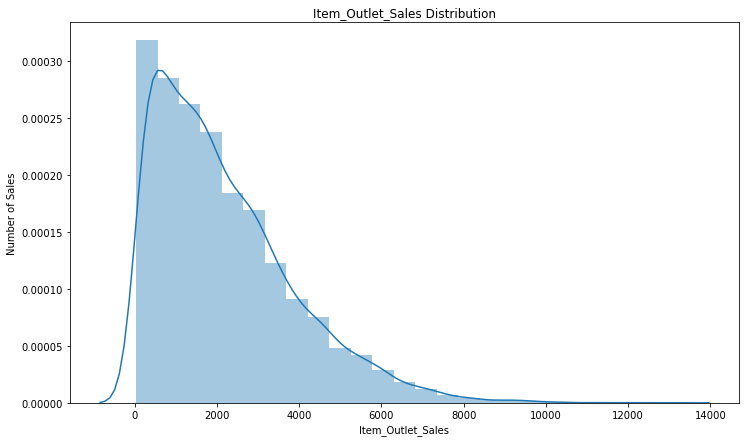

In [10]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

<h4>Hypothesis: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.</h4>

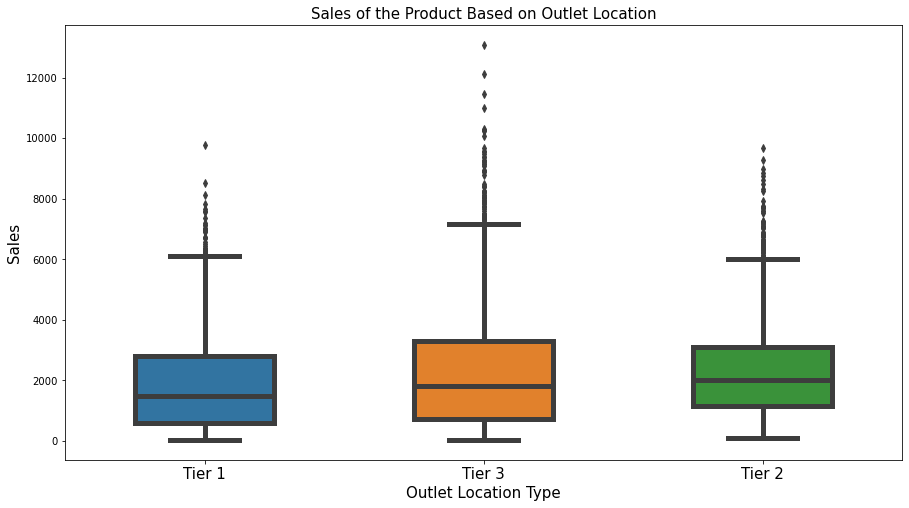

In [11]:
plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=train,width=0.5,linewidth=5)
ax.set_xlabel('Outlet Location Type',fontsize=15)
ax.set_ylabel('Sales',fontsize=15)
plt.title('Sales of the Product Based on Outlet Location',fontsize=15)
ax.tick_params(axis='x',labelsize=15)

<h4>Conclusion: Hypothesis is True but there is no significant difference between the sales in Tier 1 Cities and Tier 2 Cities.</h4>

<h4>Hypothesis: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. </h4>

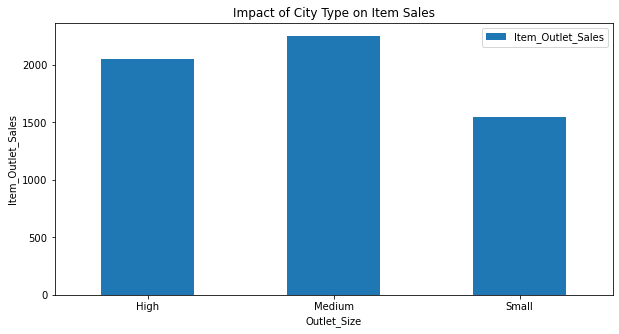

In [12]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc = np.median)
Outlet_Identifier_pivot.plot(kind='bar',figsize=(10,5))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of City Type on Item Sales')
plt.xticks(rotation=0)
plt.show()

<h4> Conclusion: Hypothesis is false/rejected as outlet which are Medium sized sold the maximum number of products </h4>

<h4> Sales of Product under each Outlet type </h4>

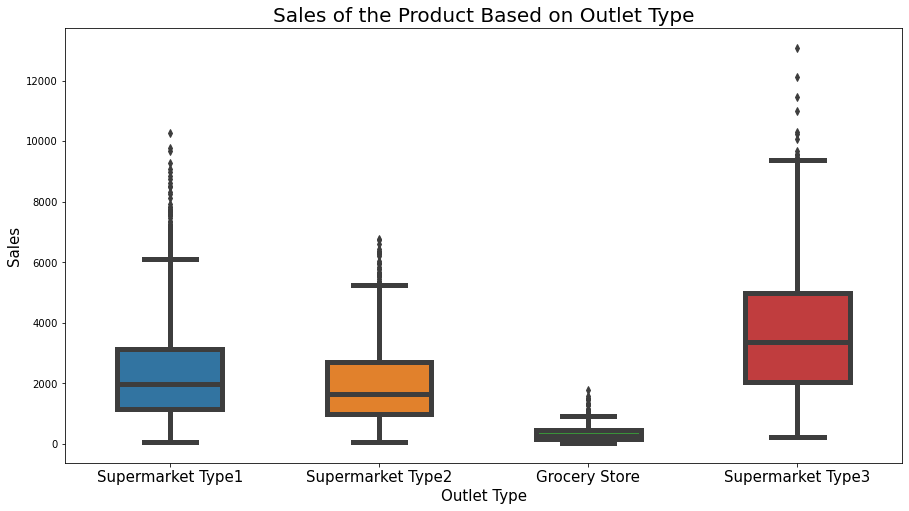

In [13]:
plt.rcParams['figure.figsize']=(15,8)
ax = sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train,width=0.5,linewidth=5)
ax.set_xlabel('Outlet Type',fontsize=15)
ax.set_ylabel('Sales',fontsize=15)
plt.title('Sales of the Product Based on Outlet Type',fontsize=20)
ax.tick_params(axis='x',labelsize=15)

<h4> Outlet Size Distribution of Dataset </h4>

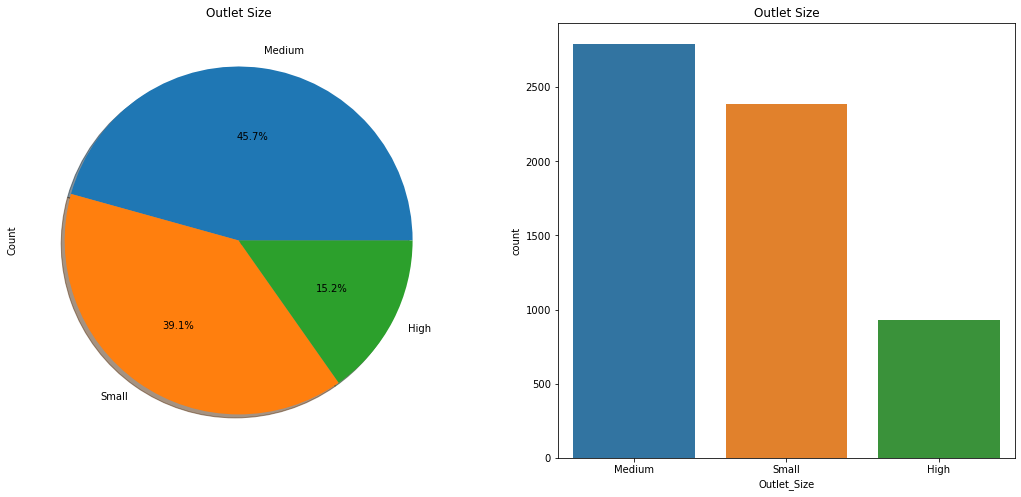

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outlet Size')
ax[0].set_ylabel('Count')
sns.countplot('Outlet_Size',data=train,ax=ax[1],order=train['Outlet_Size'].value_counts().index)
ax[1].set_title('Outlet Size')
plt.show()

<h4> Sales of Each Type of Product </h4>

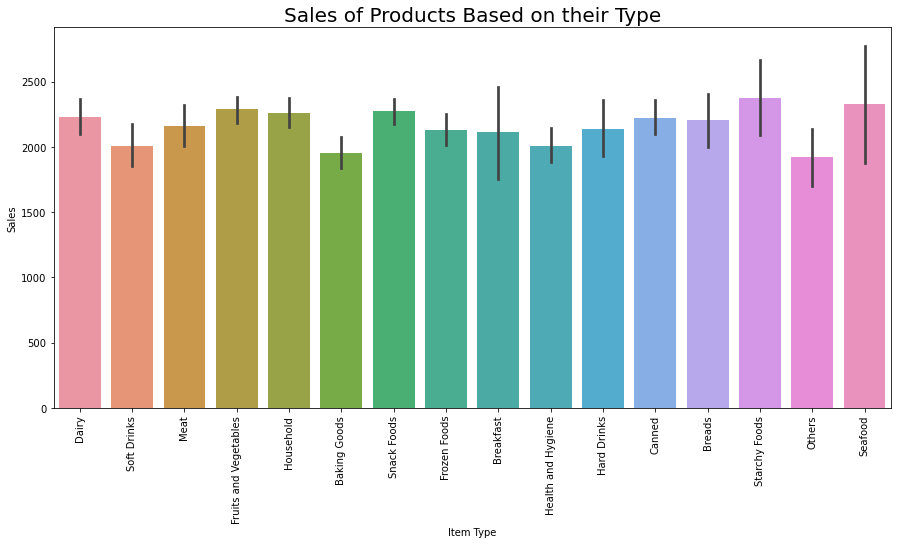

In [15]:
plt.rcParams['figure.figsize']=(15,7)
ax = sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=train)
ax.set_xlabel('Item Type',fontsize=10)
ax.set_ylabel('Sales',fontsize=10)
plt.title('Sales of Products Based on their Type',fontsize=20)
ax.tick_params(axis='x',labelsize=10,rotation=90)

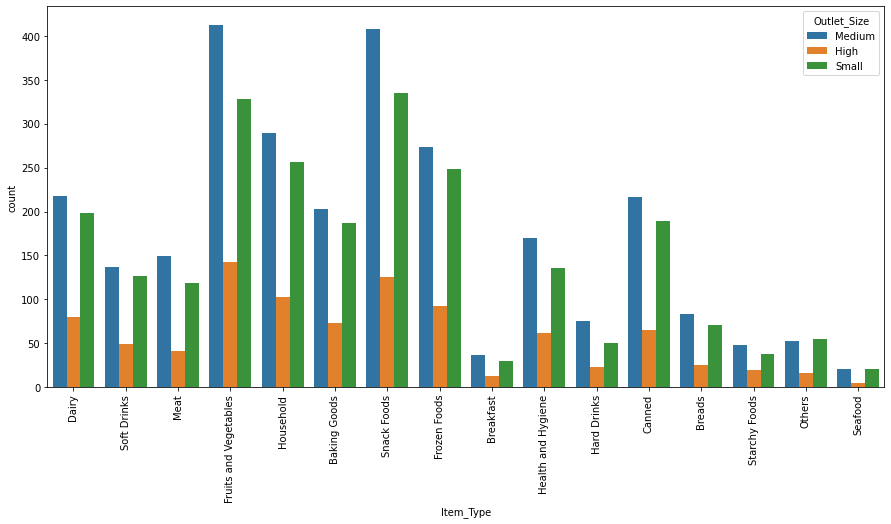

In [16]:
sns.countplot(x="Item_Type", hue="Outlet_Size", data=train)
plt.xticks(rotation=90);

<h4>Conclusion: By Comparing the above 2 graphs we can analyse that the Seafoods has the minimum no of items sold but at the same time has the maximum Sale. This tells us that Seafoods are the most expensive items sold among all the Outlets </h4>

<h4> Distribution of the Item_Fat_Content </h4>

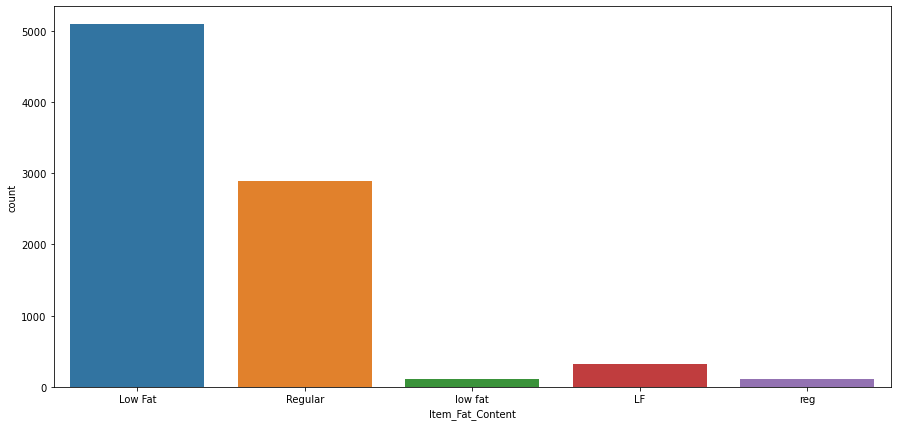

In [17]:
sns.countplot(train.Item_Fat_Content)

<h4> Distribution of the Outlet_Type </h4>

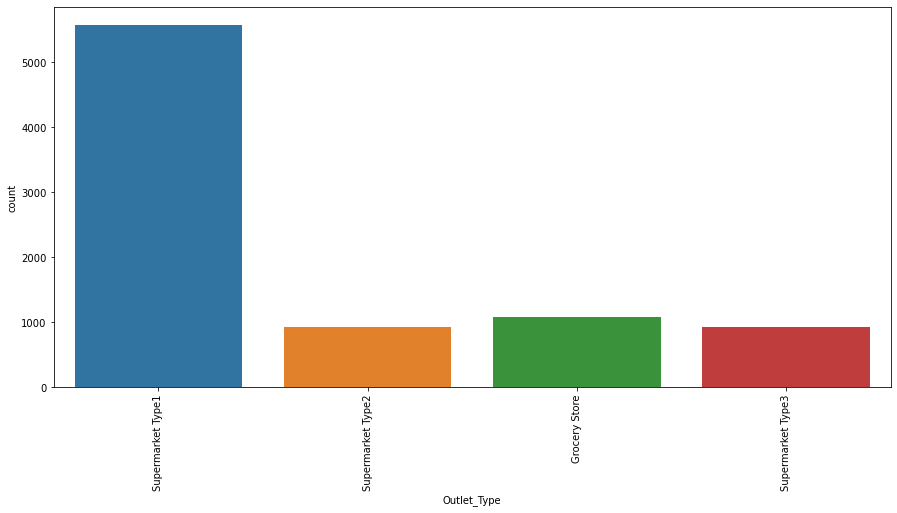

In [18]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90);

<h4> Impact of Outlet_Establishment_Year and Item_Outlet_Sales </h4>

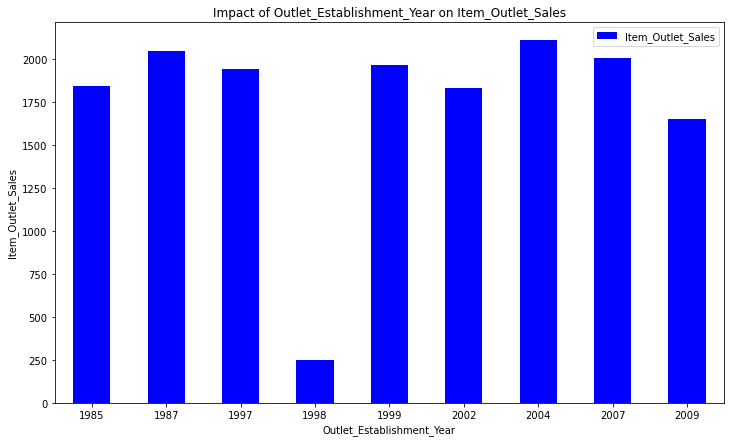

In [19]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h4> Impact of Item_Fat_Content on Item_Outlet_Sales </h4>

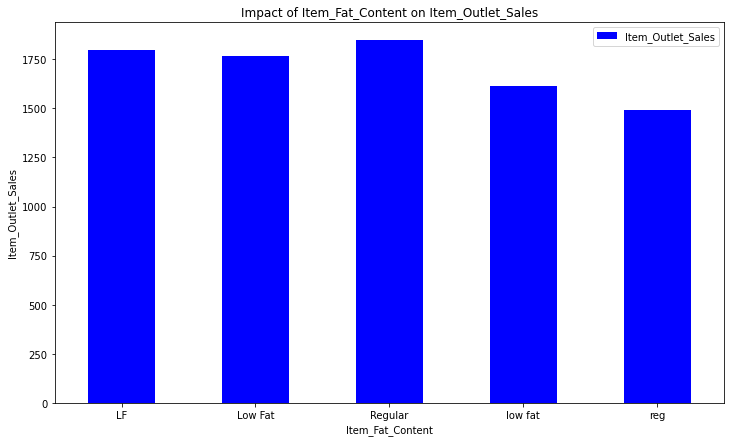

In [20]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h4>Item Visibility Distribution</h4>

Text(0.5, 1.0, 'Item_Visibility Distribution')

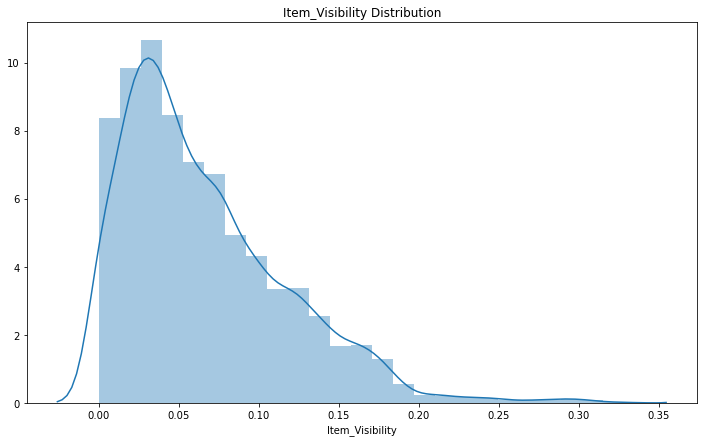

In [21]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Visibility, bins = 25)
plt.xlabel("Item_Visibility")
plt.title("Item_Visibility Distribution")

<h2>Correlation of Numerical Variables to Target Variable: Item_Outlet_Sales </h2>

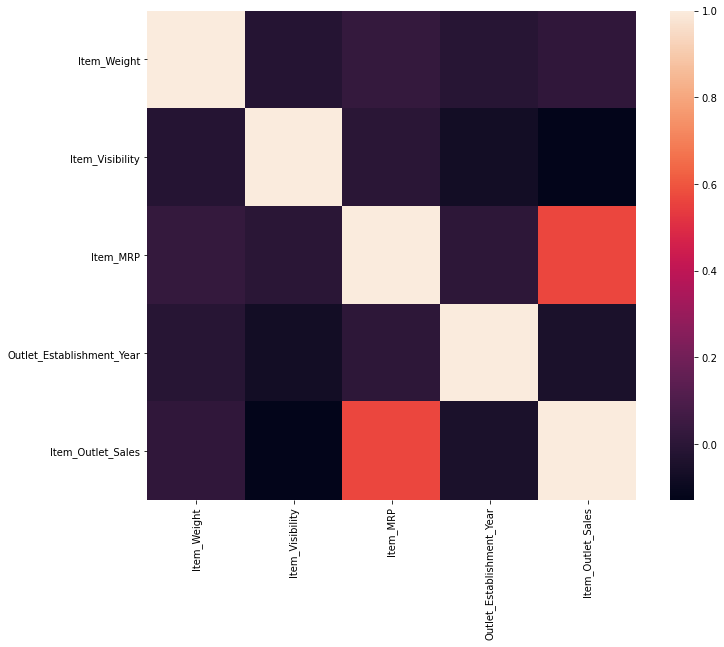

In [22]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True);

# Data Preprocessing

<h2> Missing Values </h2>

In [23]:
# Check missing values
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<h4> Imputing Item Weight with Mean </h4>

In [24]:
# Mean value of item weight for each item identifier
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [25]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [26]:
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)

<h4> Outlet Size with Mode </h4>

In [27]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [29]:
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)

In [30]:
# Final Missing Values
data.drop(['Item_Outlet_Sales'], axis = 1).apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
dtype: int64

# Feature Engineering

<h4> 1. Modifying Item_Visibility </h4>

Item_Visibility minimum value is 0, which makes no sense since every product must be visible to all clients. 
So we are considering it as missing value and imputing it with mean visibility of the product.

In [31]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_item_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [32]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original zeroes: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final zeroes: %d'%sum(data['Item_Visibility'] == 0))

Original zeroes: 879
Final zeroes: 0


<h4> Determine the years of operation of a store </h4>

In [33]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

<h4>Create a broad category of Type of Item </h4>

Item_Type variable has 16 categories which might not prove to be very useful in our analysis. 
So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). Therefore, we can group the items within these 3 categories

In [34]:
# Get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# Rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

<h4> Modify categories of Item_Fat_Content </h4>

We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [35]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In previous section, there were some non-consumables as well so we can also create a separate category for such kind of observations.

In [36]:
# Marking non-consumables as separate category in low_fat
data.loc[data['Item_Type_Combined'] == "Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

<h4> Creating variable Item_Visibility_MeanRatio </h4>

In [37]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [38]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food,0.960069
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,15,Food,1.000000
4,NCD19,8.93,Non-Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable,1.000000


In [39]:
data.shape

(14204, 16)

<h4>Checking the correaltion of old columns to target variable and new columns to target variable </h4> 

In [40]:
changed_cols = data[['Item_Visibility','Outlet_Establishment_Year', 'Item_Type', 'Item_Outlet_Sales']]
chn = data[['Item_Visibility_MeanRatio', 'Outlet_Years', 'Item_Type_Combined', 'Item_Outlet_Sales']]

label_encoder = LabelEncoder()
changed_cols['Item_Type'] = label_encoder.fit_transform(changed_cols['Item_Type'])
chn['Item_Type_Combined'] = label_encoder.fit_transform(chn['Item_Type_Combined'])
numeric_features1 = changed_cols.select_dtypes(include=[np.number])
numeric_features2 = chn.select_dtypes(include=[np.number])
corr1 =numeric_features1.corr()
corr2 =numeric_features2.corr()

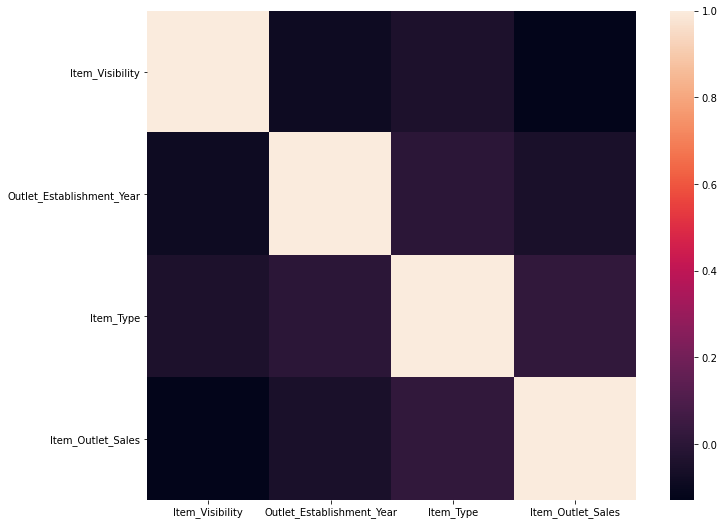

In [41]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr1, square=True);

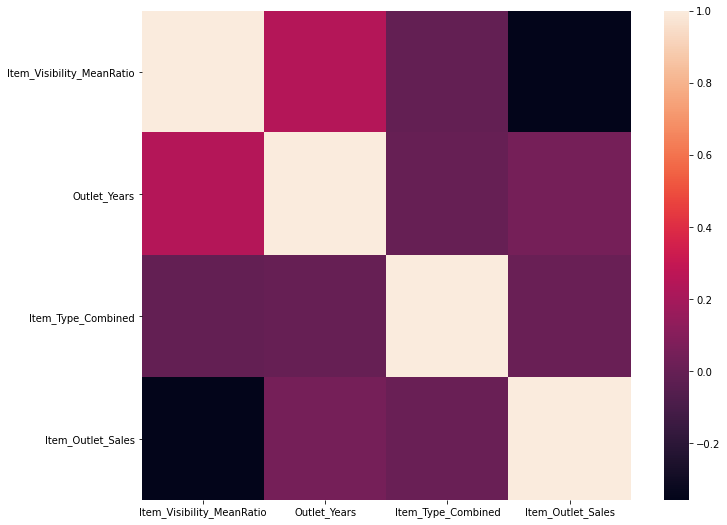

In [42]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr2, square=True);

<h2> One Hot Encoding </h2>

In [43]:
le = LabelEncoder()

# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

<h2> Exporting Updated Datasets </h2>

In [44]:
# Drop the columns which have been converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Divide into test and train
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Droping unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

# Exporting files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [45]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

# Model Building

In [66]:
# target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    # target had been normalized
    Sq_train = (dtrain[target])
    
    # Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    # Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    # Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h2> Linear Regression </h2>

In [67]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1177
CV Score : Mean - 1178 | Std - 41.6 | Min - 1124 | Max - 1253


<h2> Ridge Regression Model </h2>

In [68]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 1178
CV Score : Mean - 1179 | Std - 43.03 | Min - 1125 | Max - 1258


<h2>Decision Tree Model </h2>

In [69]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1058
CV Score : Mean - 1092 | Std - 45.4 | Min - 1008 | Max - 1189


<h2>XGBOOST Model </h2>

In [70]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# Predict training set
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [72]:
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 155.99056122854975
RMSE : 981.9


In [73]:
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGboost.csv", index=False)

In [60]:
X = pd.read_csv('XGBoost.csv')

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

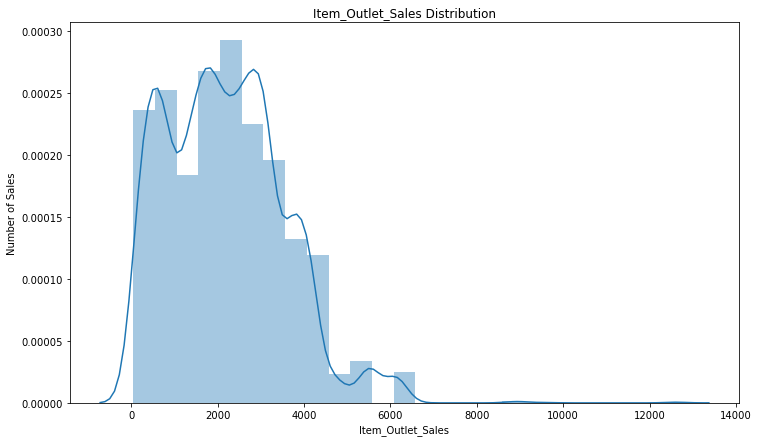

In [61]:
plt.figure(figsize=(12,7))
sns.distplot(X.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

<h1>THANK YOU!</h1>